# Uber data, NYC

One of the cooler massive datasets available on the internet is courtesy of NYC's Taxi and Limo Commission. Five ThirtyEight blog obtained the data (available [here](https://github.com/fivethirtyeight/uber-tlc-foil-response)) from a FOIA request; they have data from April-September 2014 and January-June 2015 available on their site.

In this notebook, we're going to use ```geoplot``` in order to generate a ```kdeplot``` courtesy of ```seaborn``` overlaid on the Five boroughs. Let's get to mapping!



First step: Install and import all of the needed packages to get everything going: Geoplot (with Cartopy), numpy, matplotlib, pandas, geopandas, shapely, and PIL.



In [0]:
!apt-get -qq install python-cartopy python3-cartopy
! pip install geoplot
! pip install descartes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import PIL
import geoplot

One of the obvious key features of Colab notebooks is the ability to share them easily, so our data (we're just going to look at June 2014) is stored on our Google Drive, so let's mount it in order to access the data set.

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Great! Now that we can access our data, let's import it into a pandas dataframe called ```df``` and then clean out some of the data outside NYC. The next step is the important one...converting our pandas dataframe into a geodataframe. In order to actually have our geodataframe(```gdf```) pass as a list of longitudes/latitudes, we need to use shapely's ```Point``` and set a coordinate system using ```crs```.  Once all this is done, we can take a look at the head to make sure that all of our data seems consistent.

In [0]:
#set file path and read into df
file = '/gdrive/My Drive/uber_jun14.csv'
df = pd.read_csv(file)

#filter out extra data
df = df[(df.Lat > 40.5) & (df.Lat < 40.9)]
df = df[(df.Lon > -74.25) & (df.Lon < -73.7)]

#transform into gdf
df['Coordinates'] = list(zip(df.Lon, df.Lat))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gp.GeoDataFrame(df, geometry='Coordinates')
gdf.crs = {'init': 'epsg:4326'}
print(gdf.head())

Now that we have our data in a geodataframe, we're going to use geoplot to map it. We're going to start with a basemap from gp, the five boroughs, and read that data into `mdf`.  We need to set the crs to the same as `gdf` and then we're going to use a kdeplot (kernel density estimation, wiki article [here](https://en.wikipedia.org/wiki/Kernel_density_estimation)) to turn our scatter data into a smooth KDE heat map. `shade = True` plots a continuous distribution instead of contour lines and `n_levels` sets the number of color levels within our KDE. Look at our map!

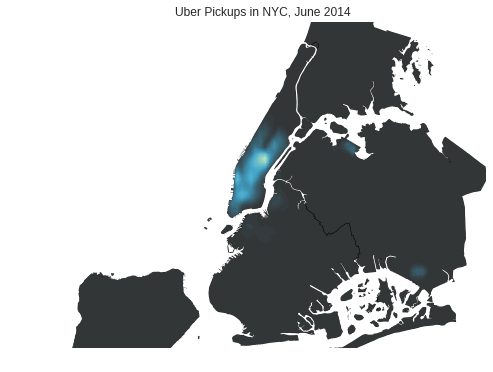

In [0]:
#build base map
mdf = gp.read_file(gp.datasets.get_path('nybb'))
mdf = mdf.to_crs(gdf.crs)
ax = geoplot.polyplot(mdf)

#build map on base map
geoplot.kdeplot(gdf, ax=ax, shade=True, 
                clip=mdf.geometry, 
                cmap="GnBu_d", n_levels=40,
                figsize=(15,15))
plt.title("Uber Pickups in NYC, June 2014")
plt.show()